<a href="https://colab.research.google.com/github/dewdevil99/Image-Captioning-System/blob/main/Image_Captioning_Testing_Code_Final_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import numpy as np
from PIL import Image
import os
import random
from pickle import dump, load
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
nltk.download('stopwords')
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


start the person is walking on the paved road end


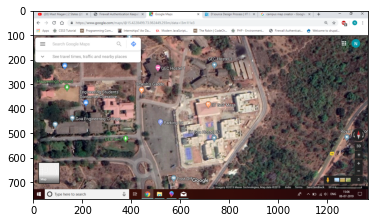

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import random
from pickle import load
from keras.models import load_model
from keras.applications.xception import Xception
import os
#We extract the 2048 fature vector in this fucntion
def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

#we get the word corresponding to a particular index from here
def word_for_id(integer, tokenizer):
  for word,index in tokenizer.word_index.items():
    if index == integer:
         return word
  return None

#We generate the description here for a given model
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text



max_length = 38
tokenizer = load(open("tokenizer.p","rb"))
model = load_model("model_final.h5")
xception_model = Xception(include_top=False, pooling="avg")
i=0

#The following code snippet predicts caption on a user input image
#Please put the correct image path in the img_path variable
#img_path = "picture.png"
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

#put the corret image name in the variabe im, for eample sample_img.jpg
#im ="picture.png"
#captions = descriptions[im]

description = generate_desc(model, tokenizer, photo, max_length)
print(description)
plt.imshow(img)

#The following code is to predict out put along with the bleu score o testing data. We have comented it becuase it requires 
#The dataset and it is too large to upload, hence the data set is not provided
# #start = random.randint(1,2000)
# start = 1145
# print(start)
# for im in os.listdir(dataset_images + "/"):
#   if im not in train_imgs:
#     if i >=start:
#       photo = extract_features(dataset_images + "/" + im, xception_model)
#       img = Image.open(dataset_images + "/" + im)
#       captions = descriptions[im]

#       description = generate_desc(model, tokenizer, photo, max_length)
#       hypo = description.split()
#       ref = []
#       for c in captions:
#         caption = c.split()
#         ref.append(caption)

#       bleuScore_bi = nltk.translate.bleu_score.sentence_bleu(ref,hypo,weights=(0,1,0,0))
#       bleuScore_uni = nltk.translate.bleu_score.sentence_bleu(ref,hypo,weights=(1,0,0,0))
#       bleuScore_cum = nltk.translate.bleu_score.sentence_bleu(ref,hypo,weights=(0.25,0.25,0.25,0.25))
#       print("\n\n")
#       print(description)
#       print("\n")
#       print("BLEU Score Uni = ",bleuScore_uni)
#       print("BLEU Score Bi = ",bleuScore_bi)
#       print("BLEU Score Cum= ",bleuScore_cum)
#       plt.imshow(img)
#       plt.pause(5)
#     if i>start + 10:
#       break
#     i+=1

In [ ]:
#Code to predict captions on a video

from google.colab.patches import cv2_imshow
import cv2
import time

def extract_features(frame, model):
        image=cv2.resize(frame,(299,299),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        image = np.array(image)
        #for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
  for word,index in tokenizer.word_index.items():
    if index == integer:
         return word
  return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

# Same command function as streaming, its just now we pass in the file path, nice!
#video_path = 
cap = cv2.VideoCapture(video_path)


# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
frame_seq=0
time_length = 11
fps=24
# While the video is opened
while cap.isOpened():
    
    
    #print("Inside while")
    frame_no = (frame_seq /(time_length*fps))
    cap.set(1,frame_seq)
    #Read the video file.
    ret, frame = cap.read()
    
    #If we got frames, show them.
    if ret == True:
        photo = extract_features(frame, xception_model)
        
        description = generate_desc(model, tokenizer, photo, max_length)
        print("\n\n")
        print(description)
        frame=cv2.resize(frame,(450,300),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        cv2_imshow(frame)
        #plt.imshow(frame)
        frame_seq+=48

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            
            break
        plt.pause(5) 
    # Or automatically break this whole loop if the video is over.
    else:
        print("Breaking loop")
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()